In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 参数设置
结果显示signalN = 3比6时超额收益大很多

In [2]:
##%% 重要参数设置
##%% 设置用多少个月的A股收益率作凸度信号
signalN = 3
##%% 设置从哪一年开始(最小2003)
BeginYear = 2003
## 设定多空临界值
door = 0.0

In [3]:
bond1 = pd.read_excel('中债-国开行债券总财富(1-3年)指数.xlsx',usecols=[2,6],index_col=0)['2003':]
bond5 = pd.read_excel('中债-国开行债券总财富(3-5年)指数.xlsx',usecols=[2,6],index_col=0)['2003':]
bond10 = pd.read_excel('中债-国开行债券总财富(7-10年)指数.xlsx',usecols=[2,6],index_col=0)['2003':]
hs300 = pd.read_excel('沪深300月度2002起.xlsx',usecols=[2,6],index_col=0)['2003':][:-1]

In [4]:
hs300.index = bond1.index

In [5]:
bond10.tail()

,收盘价(元)
日期,
2019-01-31,192.51
2019-02-28,191.66
2019-03-29,192.84
2019-04-30,191.23
2019-05-21,192.68


In [6]:
bonds = pd.concat([bond1, bond5, bond10, hs300],axis = 1)
bonds.columns = ['1year','5year','10year','hs300']
bonds = bonds[:-1]

In [7]:
bonds.tail()

,1year,5year,10year,hs300
日期,,,,
2018-12-31,176.92,187.02,191.80,3010.65
2019-01-31,178.19,189.21,192.51,3201.63
2019-02-28,178.57,188.88,191.66,3669.37
2019-03-29,179.02,189.38,192.84,3872.34
2019-04-30,178.60,188.09,191.23,3913.21


In [8]:
monthR = bonds/bonds.shift(1)-1
monthR = monthR[str(BeginYear):].fillna(0)
signal = bonds['hs300']/bonds['hs300'].shift(signalN)-1
signal = signal.shift(1)[str(BeginYear):].fillna(0)
LongDivShort = monthR['10year']-monthR['1year']

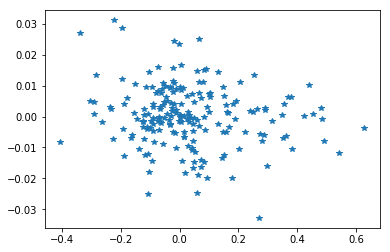

In [9]:
plt.plot(list(signal),list(LongDivShort),'*')

In [10]:
shortSignal = (signal>=door)
shortSignal = shortSignal.fillna(0)
longSignal = (signal<door)
HSsignalR = longSignal*monthR['10year']+shortSignal*monthR['1year']
HSsignalR = pd.DataFrame(HSsignalR.fillna(0),columns=['HSsignal'])
meanWeightR = pd.DataFrame(monthR[['1year','10year']].mean(axis=1),columns = ['1&10meanWeight'])
HSsignalAllR = pd.concat([monthR[['1year','10year']],meanWeightR,HSsignalR],axis=1)
HSsignalAll = ((HSsignalAllR+1).cumprod())*100

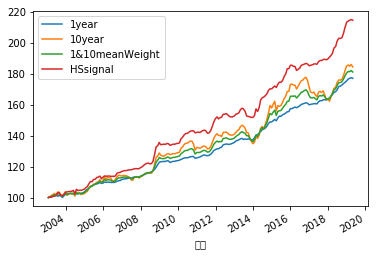

In [11]:
HSsignalAll.plot()

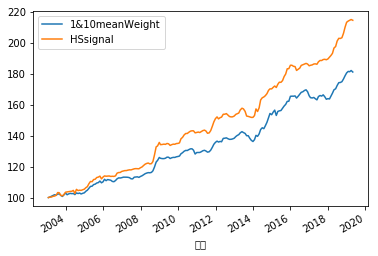

In [12]:
HSsignalAll[['1&10meanWeight','HSsignal']].plot()

In [13]:
yearExcess = pd.DataFrame(index = np.arange(BeginYear,2020),columns = ['ExcessReturn'])
for year in range(BeginYear,2020):
    MonthReturn = HSsignalAllR[str(year)][['1&10meanWeight','HSsignal']]
    YearReturn = (MonthReturn+1).prod()-1
    yearExcess['ExcessReturn'][year]=YearReturn['HSsignal']-YearReturn['1&10meanWeight']

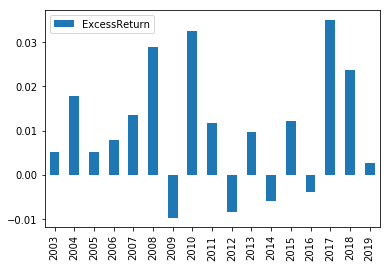

In [14]:
yearExcess.plot(kind = 'bar')

In [15]:
##累计超额收益
(HSsignalAll['HSsignal'][-1]-HSsignalAll['1&10meanWeight'][-1])/100

0.3343195304135037